In [5]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     -------------------------------------- 948.2/948.2 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=364b0baa4f9b214ceb3e58a79fc4edf1f94dc26a260b1d882b62e0d5700afa65
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
from scipy.interpolate import interp1d
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

In [219]:
df_allstocks = pd.read_csv('C:/Users/ASUS/Desktop/kes/archive/stock_details_5_years.csv')

In [222]:
df_allstocks

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


In [224]:
df_allstocks=df_allstocks.pivot(index='Date',columns='Company',values='Close')
df_allstocks

Company,A,AAPL,ABBV,ABEV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,XEL,XOM,XYL,YUM,ZBH,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-29 00:00:00-05:00,69.001251,43.083508,71.184914,3.631820,NaN,67.365654,28.379999,150.171722,249.089996,81.795799,...,147.668747,21.815151,44.753716,61.217907,67.074562,83.960030,107.434830,NaN,37.560001,89.673248
2018-11-30 00:00:00-05:00,69.753235,42.850754,74.636864,3.606481,NaN,68.092094,28.620001,153.388290,250.889999,83.988708,...,148.563202,21.545931,45.552742,61.558617,68.655006,84.289078,109.359970,NaN,39.259998,90.736526
2018-12-03 00:00:00-05:00,71.989975,44.348064,74.153923,3.648712,NaN,68.294380,28.389999,155.532669,255.259995,85.441521,...,150.137817,21.619356,45.978298,62.890438,68.015305,84.151978,108.817947,NaN,39.119999,90.446533
2018-12-04 00:00:00-05:00,70.293159,42.397247,71.691612,3.606481,NaN,65.747253,27.940001,153.099289,245.820007,82.636406,...,146.569305,20.493515,45.882774,61.504402,64.007759,82.881523,104.659248,NaN,37.209999,87.546684
2018-12-06 00:00:00-05:00,69.329056,41.924541,71.517448,3.522021,NaN,65.784035,27.750000,148.474899,250.630005,81.804947,...,145.441925,21.815151,46.212795,60.699108,62.869465,83.631004,105.519012,NaN,42.980000,87.392029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 00:00:00-05:00,123.989998,191.309998,138.470001,2.760000,129.039993,102.699997,85.949997,333.130005,619.719971,182.669998,...,244.470001,31.990000,60.430000,104.010002,102.220001,128.332977,113.830002,63.830002,190.639999,179.350006
2023-11-24 00:00:00-05:00,126.620003,189.970001,138.669998,2.750000,128.369995,102.870003,86.599998,334.040009,619.429993,183.050003,...,244.279999,31.940001,60.520000,104.570000,103.260002,127.904991,113.430000,64.529999,193.089996,180.210007
2023-11-27 00:00:00-05:00,125.010002,189.789993,139.089996,2.760000,129.000000,102.709999,87.000000,332.429993,619.270020,183.770004,...,245.039993,31.620001,60.450001,103.959999,103.180000,127.690002,113.839996,65.550003,191.910004,178.789993


In [226]:
def select_stocks(tickers):
    df_portfolio = df_allstocks[tickers]
    df_portfolio = df_portfolio.loc[start_date:end_date]
    return df_portfolio

In [228]:
def stock_price_dist(df_portfolio):
    df_returns = df_portfolio.pct_change().dropna()
    df_returns.hist(bins=100, figsize=(12, 6), color='skyblue', alpha=0.7)
    plt.tight_layout()
    plt.show()
    return df_returns

In [230]:
def close_price_history(df_portfolio):
    fig, ax = plt.subplots(figsize=(15,8))
    for i in df_portfolio.columns.values :
        ax.plot(df_portfolio[i], label = i)
    ax.set_title("Portfolio Close Price History")
    ax.set_xlabel('Date', fontsize=18)
    ax.set_ylabel('Close Price ($)' , fontsize=18)
    ax.legend(df_portfolio.columns.values , loc = 'upper right')
    # plt.xticks(rotation=90)
    plt.show(fig)

In [232]:
def cumulative_returns(df_returns):

    daily_cummulative_simple_return =(df_returns+1).cumprod()
    fig, ax = plt.subplots(figsize=(18,8))
    for i in daily_cummulative_simple_return.columns.values :
        ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

    ax.legend( loc = 'upper left' , fontsize =10)
    ax.set_title('Daily Cumulative Simple returns/growth of investment')
    ax.set_xlabel('Date')
    ax.set_ylabel('Growth of ₨ 1 investment')
    plt.show()

In [234]:
def correlation_matrix(df_returns):
    # Plot the correlation matrix heatmap
    sns.heatmap(df_returns.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
    plt.title('Correlation Matrix')

In [266]:
def build_opt_portfolio(df_returns):

    # Calculate mean returns and covariance matrix
    mean_returns = df_returns.mean()
    cov_matrix = df_returns.cov()

    # Number of portfolios to simulate
    num_portfolios = 10000

    # Results storage
    results = np.zeros((3, num_portfolios))
    port_wts = []

    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)
        port_wts.append(weights)

        # Expected portfolio return
        portfolio_return = np.sum(weights * mean_returns) * 252  

        # Expected portfolio volatility
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

        # Portfolio Sharpe ratio (assuming risk-free rate is zero)
        sharpe_ratio = portfolio_return / portfolio_stddev

        results[0,i] = portfolio_return
        results[1,i] = portfolio_stddev
        results[2,i] = sharpe_ratio


    # Convert results array to Pandas DataFrame
    results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])
    results_df['port_wts'] = [np.round(wt,2) for wt in port_wts]    
    print(results_df)


    # Find the portfolio with the maximum Sharpe ratio
    max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]
    print(max_sharpe_portfolio)


    # Find the portfolio with the minimum volatility
    min_volatility_portfolio = results_df.iloc[results_df['Volatility'].idxmin()]

    # Plot the efficient frontier
    plt.figure(figsize=(8, 6))
    plt.scatter(results_df.Volatility, results_df.Return, c=results_df['Sharpe Ratio'], cmap='plasma', marker='o', s=10, alpha=0.3)
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Return'], marker='*', color='r', s=200, label='Max Sharpe Ratio')
    plt.scatter(min_volatility_portfolio['Volatility'], min_volatility_portfolio['Return'], marker='*', color='b', s=200, label='Min Volatility')
    plt.title('Efficient Frontier')
    plt.xlabel('Volatility (Annualized)')
    plt.ylabel('Return (Annualized)')
    plt.legend()
    plt.show()

In [284]:
def build_CAPM(df_returns):
    # Assume the risk-free rate (e.g., 10-year Treasury yield)
    risk_free_rate = 0.02

    # Calculate excess returns over the risk-free rate
    excess_returns = df_returns - risk_free_rate / 252

    # Calculate the market return (e.g., S&P 500)
    market_prices = yf.download('^GSPC', start='2022-02-02', end='2023-02-02')['Close']
    market_returns = market_prices.pct_change().dropna()

    # Ensure that excess_returns is one-dimensional for linear regression
    excess_mean = excess_returns.mean(axis=1).values  # Mean excess returns should be one-dimensional

    # Flatten market_returns to make it one-dimensional
    market_returns_flat = market_returns.values.ravel()  # Convert to 1D array

    # Check if lengths match before performing regression
    if len(market_returns_flat) != len(excess_mean):
        min_length = min(len(market_returns_flat), len(excess_mean))
        market_returns_flat = market_returns_flat[:min_length]
        excess_mean = excess_mean[:min_length]

    # Perform linear regression to estimate the CAPM parameters
    slope, intercept, r_value, p_value, std_err = linregress(market_returns_flat, excess_mean)

    # Expected market return
    expected_market_return = slope * market_returns.mean()

    # Beta (systematic risk) of the portfolio
    beta = slope

    # Expected portfolio return using CAPM
    expected_portfolio_return = risk_free_rate + beta * (expected_market_return - risk_free_rate)

    # Plot the CAPM regression line
    plt.figure(figsize=(12, 6))
    plt.scatter(market_returns_flat, excess_mean, label='Stocks', alpha=0.7)
    plt.plot(market_returns_flat, intercept + slope * market_returns_flat, 'r', label='CAPM Regression Line')
    plt.title('CAPM Analysis')
    plt.xlabel('Market Returns')
    plt.ylabel('Excess Returns')
    plt.legend()
    plt.show()

    print("CAPM Analysis Results:")
    print("Beta (Systematic Risk):", beta)
    print("Expected Market Return:", expected_market_return)
    print("Expected Portfolio Return (CAPM):", expected_portfolio_return)

# Example usage:
# Assuming df_returns is a DataFrame containing your stock returns data.
# df_returns = pd.DataFrame(...)  # Replace with your actual DataFrame.
# build_CAPM(df_returns)

In [286]:
def generate_portfolio(tickers):
    print('Initiating portfolio generation')
    print('Selecting stocks for portfolio')
    df_portfolio = select_stocks(tickers)
    print('Calculating the returns fromt the stock')
    df_returns = stock_price_dist(df_portfolio)
    print('Calculating historical price trends')
    close_price_history(df_portfolio)
    print('Calculating cumulative price trends')
    cumulative_returns(df_returns)
    print('Calculating correlation between stocks in the portfolio')
    correlation_matrix(df_returns)
    print('Building the optimized portfolio from selected stocks')
    build_opt_portfolio(df_returns)
    print('Building CAPM to measure performance against the index/ risk free portfolio')
    build_CAPM(df_returns)

Initiating portfolio generation
Selecting stocks for portfolio
Calculating the returns fromt the stock


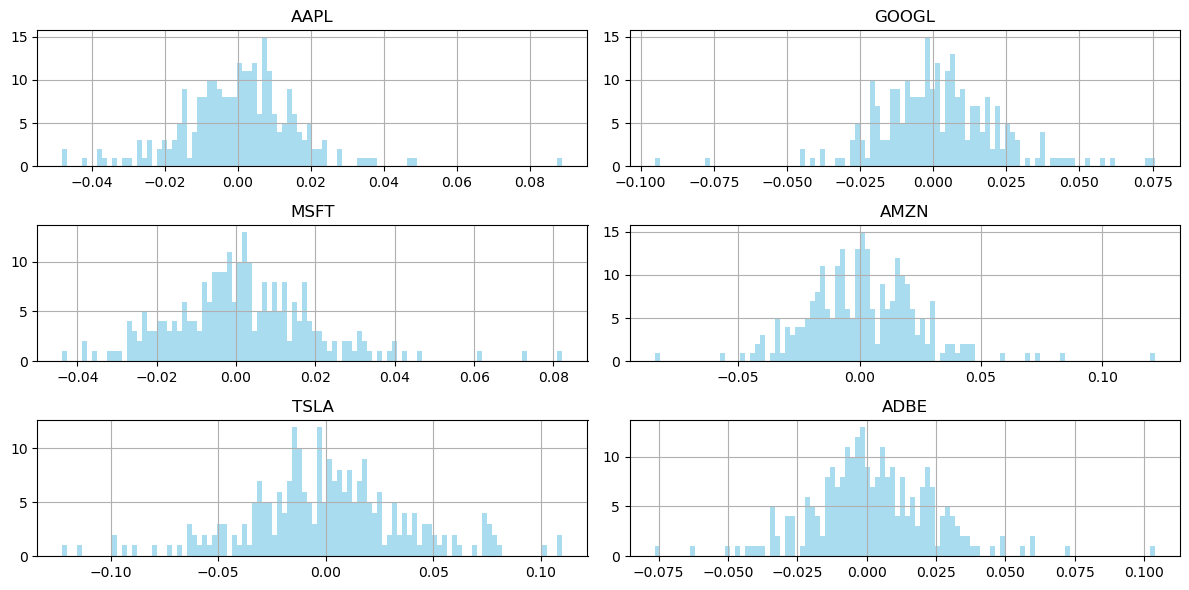

Calculating historical price trends


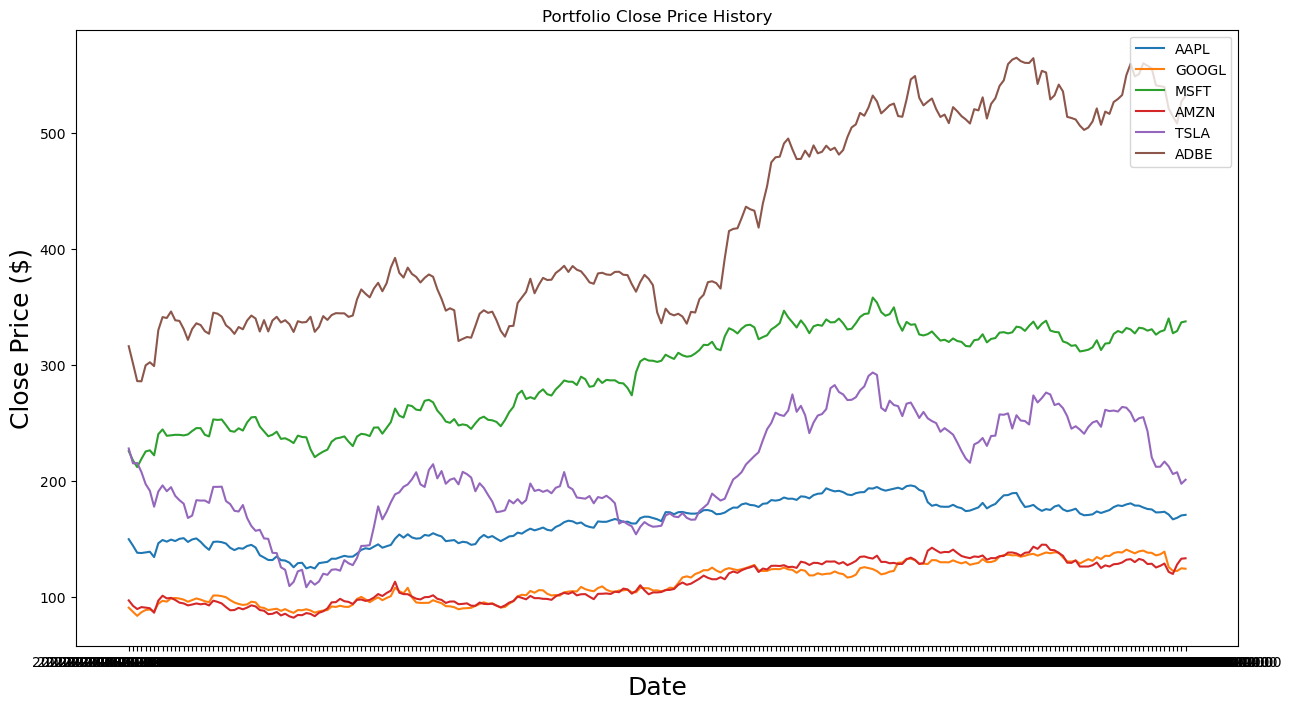

Calculating cumulative price trends


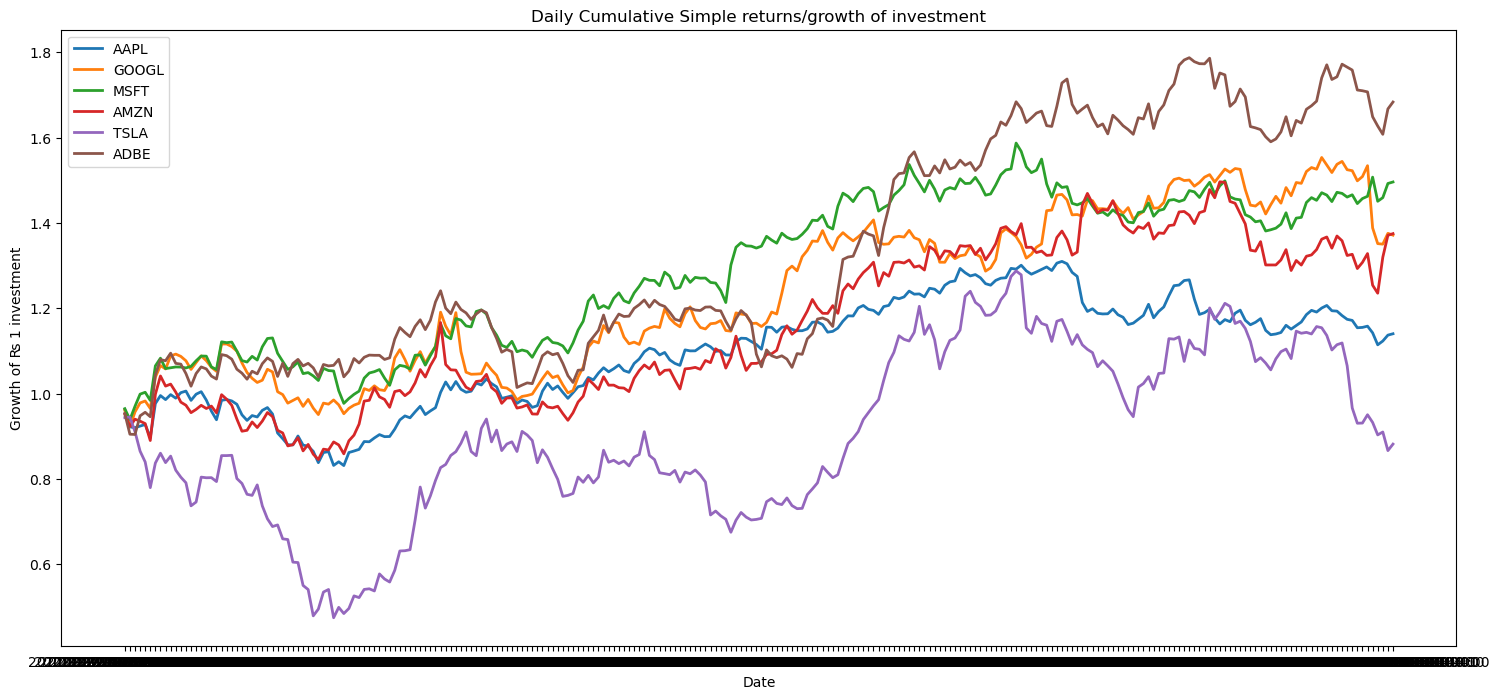

Calculating correlation between stocks in the portfolio
Building the optimized portfolio from selected stocks
        Return  Volatility  Sharpe Ratio                              port_wts
0     0.270602    0.304948      0.887372  [0.24, 0.07, 0.07, 0.34, 0.23, 0.05]
1     0.335947    0.281659      1.192744  [0.26, 0.02, 0.21, 0.04, 0.18, 0.29]
2     0.270773    0.291380      0.929278  [0.26, 0.09, 0.19, 0.19, 0.23, 0.04]
3     0.366833    0.273809      1.339738   [0.19, 0.17, 0.2, 0.04, 0.13, 0.28]
4     0.237494    0.315322      0.753177  [0.27, 0.13, 0.07, 0.14, 0.32, 0.07]
...        ...         ...           ...                                   ...
9995  0.287719    0.287110      1.002120  [0.29, 0.16, 0.01, 0.32, 0.14, 0.07]
9996  0.378128    0.289336      1.306883  [0.03, 0.09, 0.35, 0.33, 0.12, 0.09]
9997  0.291223    0.330797      0.880368  [0.14, 0.19, 0.02, 0.06, 0.34, 0.25]
9998  0.330931    0.288515      1.147013  [0.12, 0.21, 0.17, 0.21, 0.17, 0.11]
9999  0.260782    0.3

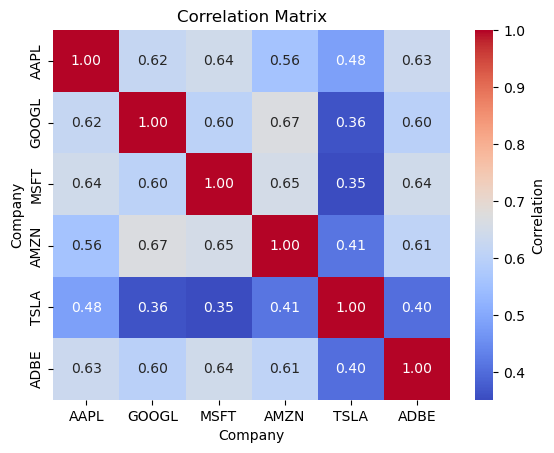

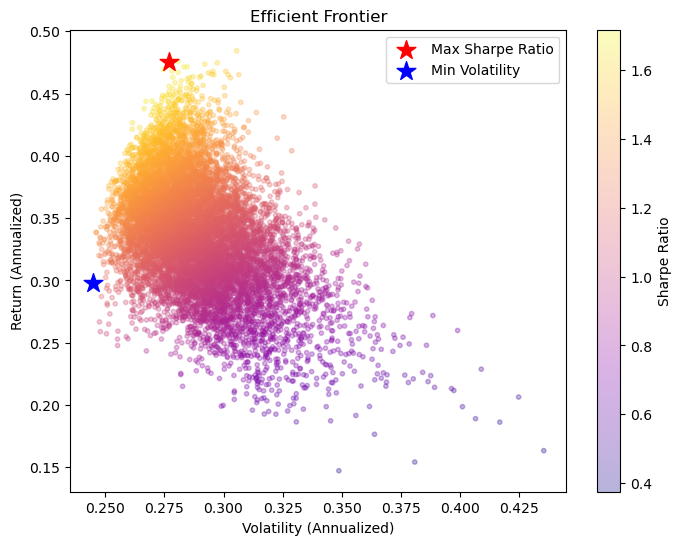

[*********************100%***********************]  1 of 1 completed

Building CAPM to measure performance against the index/ risk free portfolio


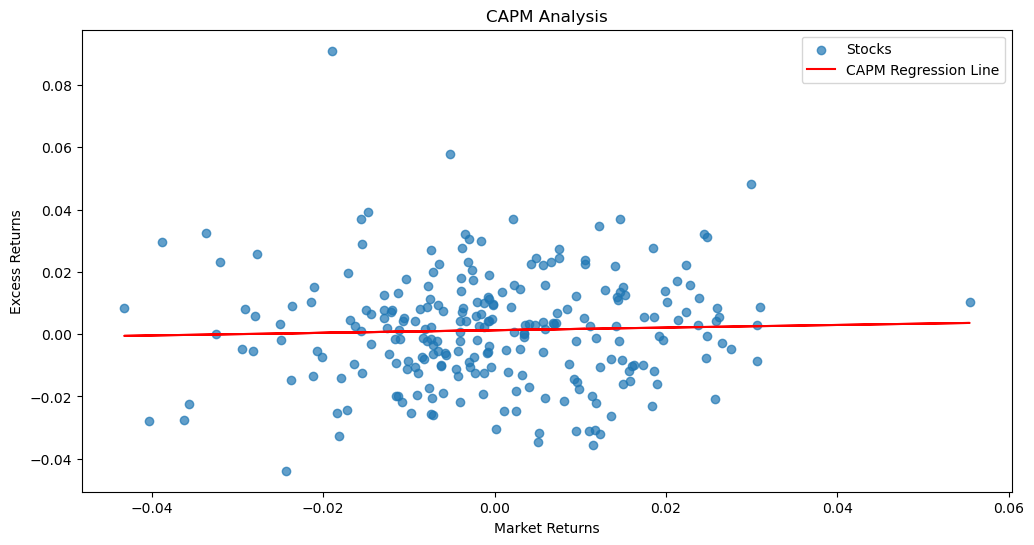

CAPM Analysis Results:
Beta (Systematic Risk): 0.04212681503867536
Expected Market Return: Ticker
^GSPC   -0.000013
dtype: float64
Expected Portfolio Return (CAPM): Ticker
^GSPC    0.019157
dtype: float64


In [288]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'ADBE']
start_date = "2022-11-01"
end_date = "2023-11-01"

generate_portfolio(tickers)

Initiating portfolio generation
Selecting stocks for portfolio
Calculating the returns fromt the stock


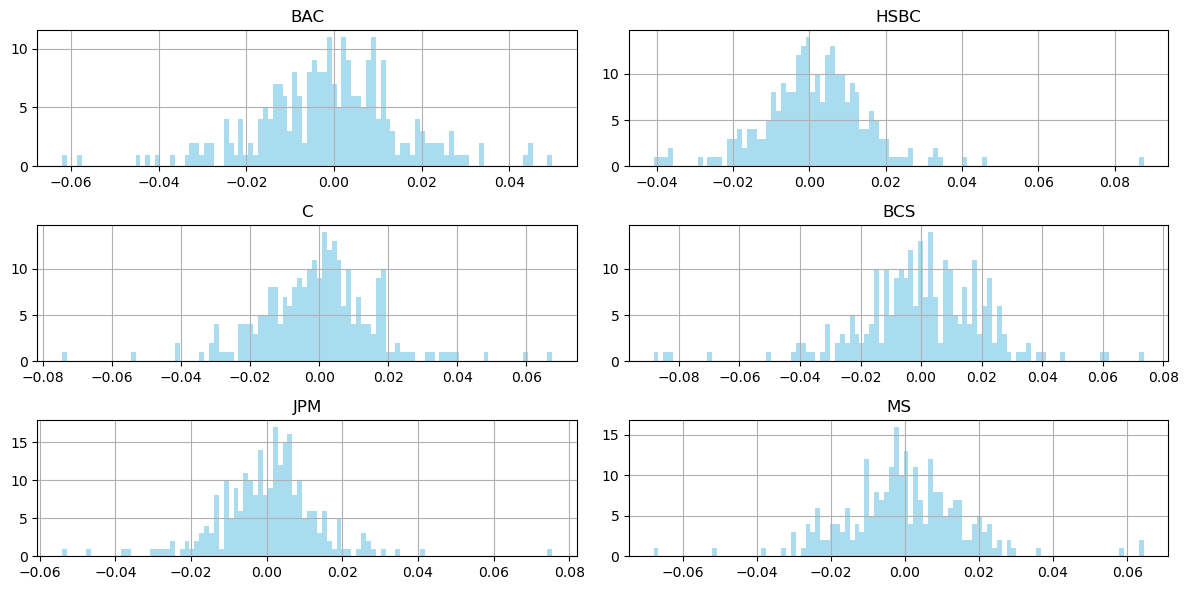

Calculating historical price trends


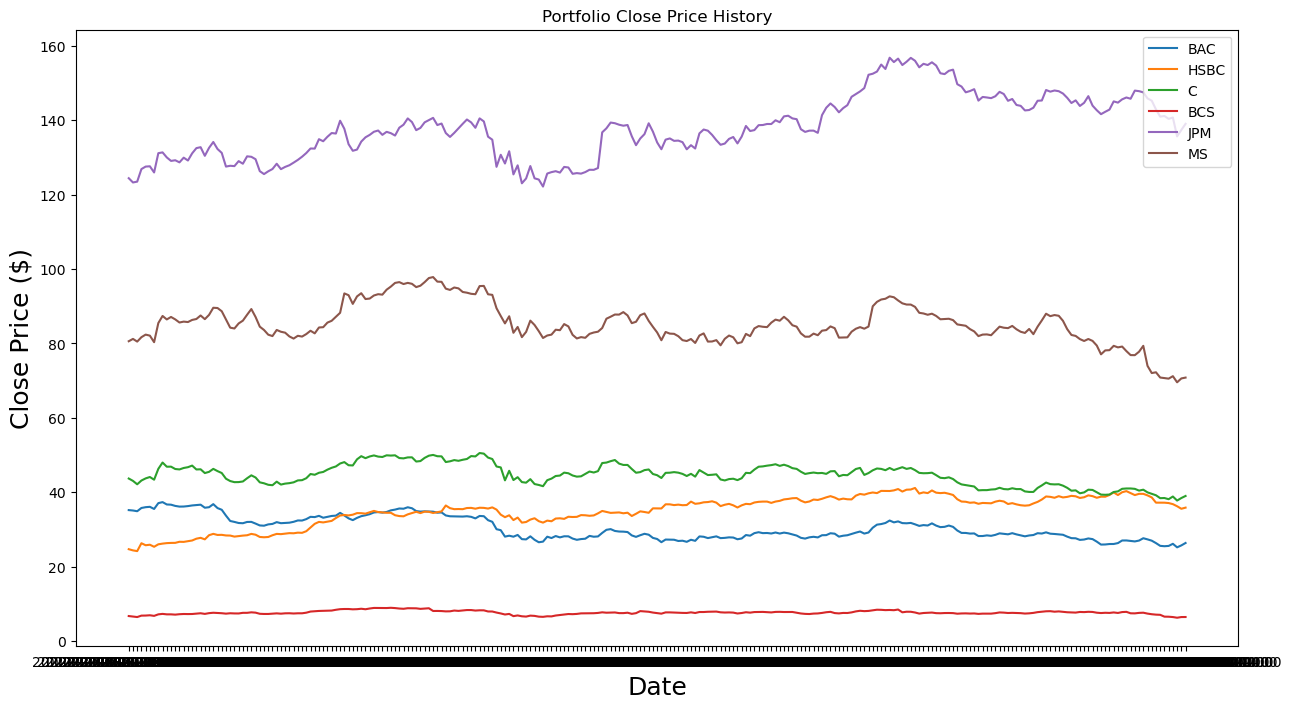

Calculating cumulative price trends


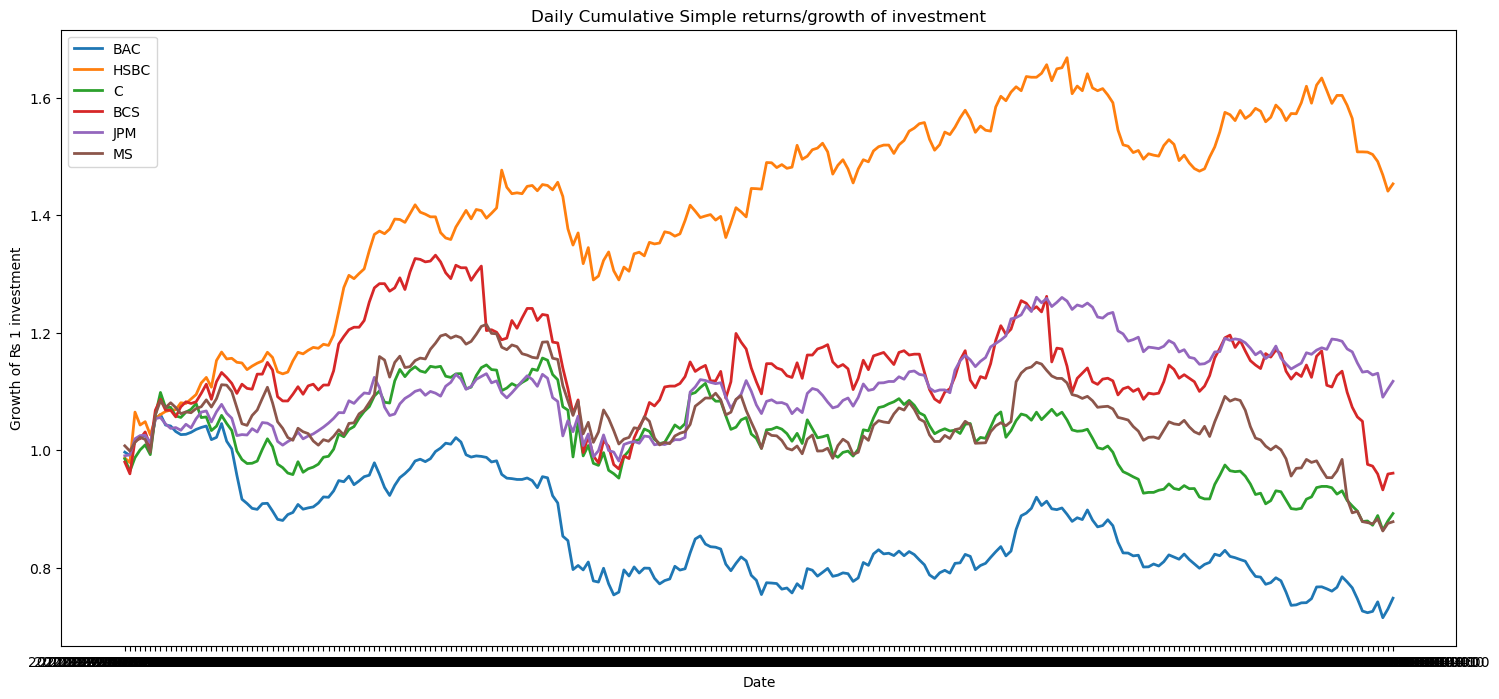

Calculating correlation between stocks in the portfolio
Building the optimized portfolio from selected stocks
        Return  Volatility  Sharpe Ratio                              port_wts
0     0.054631    0.220724      0.247509  [0.02, 0.15, 0.26, 0.26, 0.19, 0.12]
1    -0.000316    0.224360     -0.001407  [0.22, 0.06, 0.16, 0.26, 0.29, 0.01]
2    -0.037076    0.230080     -0.161142  [0.24, 0.13, 0.21, 0.26, 0.01, 0.15]
3     0.087845    0.203202      0.432307    [0.03, 0.3, 0.29, 0.05, 0.12, 0.2]
4     0.047505    0.204418      0.232393  [0.07, 0.21, 0.18, 0.07, 0.19, 0.29]
...        ...         ...           ...                                   ...
9995  0.052741    0.206523      0.255375    [0.04, 0.19, 0.1, 0.11, 0.2, 0.35]
9996 -0.035973    0.212432     -0.169341  [0.25, 0.09, 0.17, 0.03, 0.22, 0.24]
9997  0.023987    0.217085      0.110498    [0.02, 0.06, 0.3, 0.16, 0.3, 0.16]
9998  0.034314    0.217771      0.157567   [0.25, 0.19, 0.0, 0.26, 0.22, 0.09]
9999  0.095582    0.2

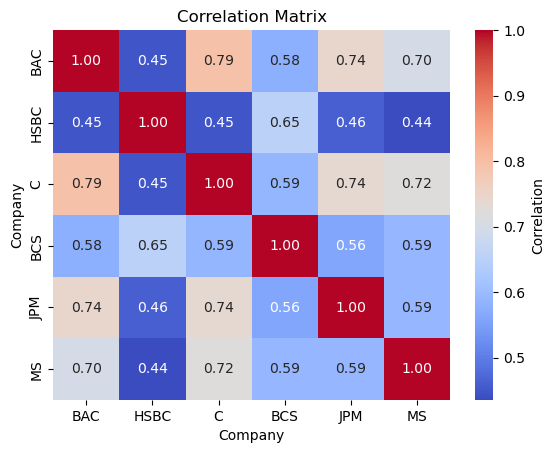

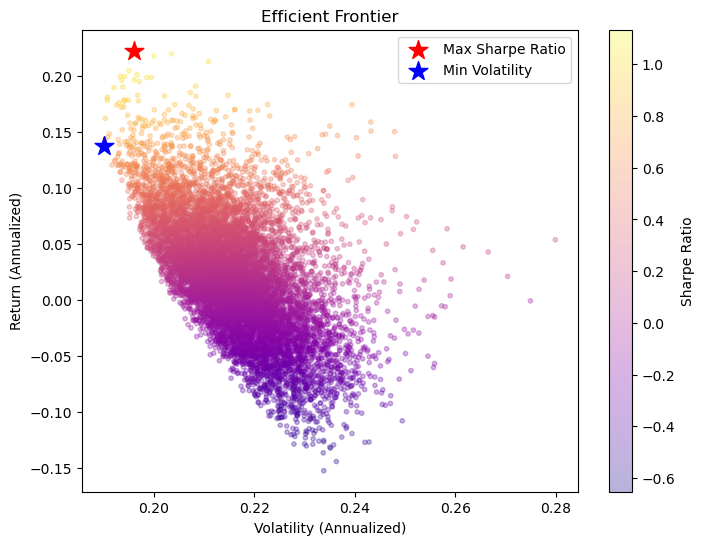

[*********************100%***********************]  1 of 1 completed

Building CAPM to measure performance against the index/ risk free portfolio


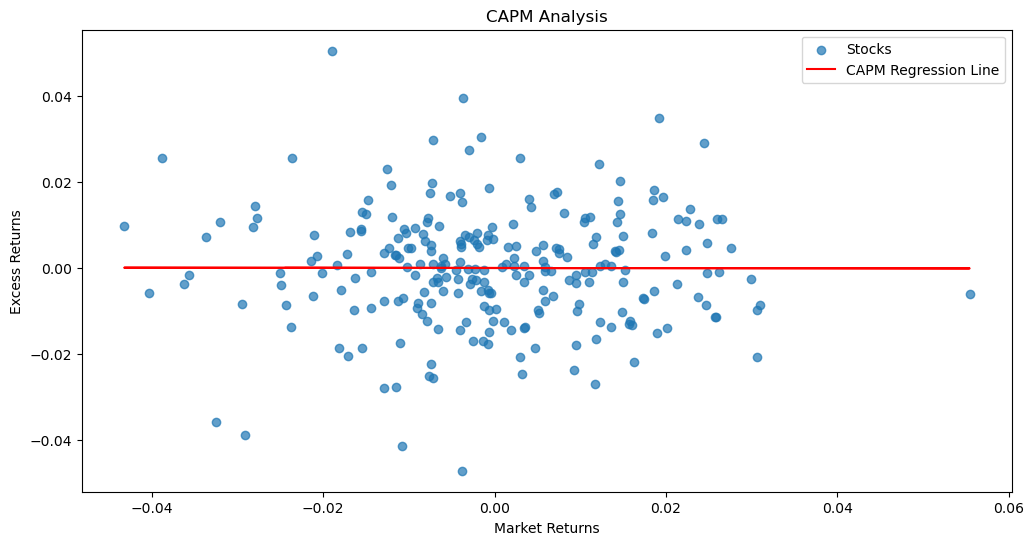

CAPM Analysis Results:
Beta (Systematic Risk): -0.001647469234697935
Expected Market Return: Ticker
^GSPC    5.222800e-07
dtype: float64
Expected Portfolio Return (CAPM): Ticker
^GSPC    0.020033
dtype: float64


In [290]:
tickers = ['BAC', 'HSBC', 'C', 'BCS', 'JPM', 'MS']
start_date = "2022-11-01"
end_date = "2023-11-01"

generate_portfolio(tickers)